In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Select All Players From 2000-Present

In [2]:
from nba_api.stats.endpoints import commonallplayers

all_players = commonallplayers.CommonAllPlayers().get_data_frames()[0]

# change data type
all_players['TO_YEAR'] = all_players['TO_YEAR'].astype('int64')

# filter players that have been played during season 2000 to current
all_players = all_players[all_players['TO_YEAR']>=2000]

In [3]:
all_players

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,PLAYER_SLUG,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_SLUG,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,mahmoud_abdul-rauf,0,,,,,None,Y,00
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,tariq_abdul-wahad,0,,,,,None,Y,00
5,949,"Abdur-Rahim, Shareef",Shareef Abdur-Rahim,0,1996,2007,shareef_abdur-rahim,shareef_abdur-rahim,0,,,,,None,Y,00
9,203518,"Abrines, Alex",Alex Abrines,0,2016,2018,alex_abrines,alex_abrines,0,,,,,None,Y,00
10,1630173,"Achiuwa, Precious",Precious Achiuwa,1,2020,2021,precious_achiuwa,precious_achiuwa,1610612761,Toronto,Raptors,TOR,raptors,raptors,Y,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,2583,"Zimmerman, Derrick",Derrick Zimmerman,0,2005,2005,derrick_zimmerman,derrick_zimmerman,0,,,,,None,Y,01
4688,1627757,"Zimmerman, Stephen",Stephen Zimmerman,0,2016,2016,stephen_zimmerman,stephen_zimmerman,0,,,,,None,Y,01
4689,1627835,"Zipser, Paul",Paul Zipser,0,2016,2017,paul_zipser,paul_zipser,0,,,,,None,Y,01
4690,1627790,"Zizic, Ante",Ante Zizic,0,2017,2019,ante_zizic,ante_zizic,0,,,,,None,Y,01


# Loading Player Stats

In [8]:
from nba_api.stats.endpoints import playercareerstats
import time

# extract all IDs
players_ID = all_players['PERSON_ID']

# initial an empty dataframe
players_stats = pd.DataFrame()
# save fail queries
error_log = []
# extracting stats
for ID in tqdm(players_ID):
    try:
        time.sleep(1) # avoid too many queries submitted at the same time
        career = playercareerstats.PlayerCareerStats(player_id=ID)
        player_career = career.get_data_frames()[0]
        players_stats = pd.concat([players_stats,player_career],axis=0,ignore_index=True)
    except:
        error_log.append(ID)

100%|██████████| 2187/2187 [1:33:23<00:00,  2.56s/it]


In [11]:
error_log

[]

In [9]:
# re-query missing IDs 
for ID in tqdm(error_log):
    try:
        time.sleep(1)
        career = playercareerstats.PlayerCareerStats(player_id=ID)
        player_career = career.get_data_frames()[0]
        players_stats = pd.concat([players_stats,player_career],axis=0,ignore_index=True)
    except:
        error_log.append(ID)

0it [00:00, ?it/s]


In [12]:
#Save result to pickle file
with open("player_stats.pkl",'wb') as f:
    pickle.dump(players_stats,f)

In [13]:
players_stats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,51,1990-91,00,1610612743,DEN,22.0,67,19,1505.0,417,...,0.857,34,87,121,206,55,4,110,149,942
1,51,1991-92,00,1610612743,DEN,23.0,81,11,1538.0,356,...,0.870,22,92,114,192,44,4,117,130,837
2,51,1992-93,00,1610612743,DEN,24.0,81,81,2710.0,633,...,0.935,51,174,225,344,84,8,187,179,1553
3,51,1993-94,00,1610612743,DEN,25.0,80,78,2617.0,588,...,0.956,27,141,168,362,82,10,151,150,1437
4,51,1994-95,00,1610612743,DEN,26.0,73,43,2082.0,472,...,0.885,32,105,137,263,77,9,119,126,1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1627826,2018-19,00,1610612746,LAC,22.0,26,25,524.0,100,...,0.733,61,139,200,38,10,24,37,64,244
15582,1627826,2018-19,00,0,TOT,22.0,59,37,1039.0,212,...,0.802,115,247,362,63,14,51,70,137,525
15583,1627826,2019-20,00,1610612746,LAC,23.0,72,70,1326.0,236,...,0.747,197,346,543,82,16,66,61,168,596
15584,1627826,2020-21,00,1610612746,LAC,24.0,72,33,1609.0,257,...,0.789,189,330,519,90,24,62,81,187,650


In [15]:
#Select all player stats for the Lakers
players_stats[players_stats.TEAM_ABBREVIATION== "LAL"]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
440,1628961,2019-20,00,1610612747,LAL,22.0,5,0,20.0,3,...,0.500,2,1,3,2,0,0,1,2,7
441,1628961,2020-21,00,1610612747,LAL,23.0,15,0,56.0,3,...,0.462,4,15,19,1,2,4,11,8,12
466,2546,2021-22,00,1610612747,LAL,37.0,30,3,828.0,133,...,0.819,23,97,120,29,21,19,24,68,396
533,2772,2007-08,00,1610612747,LAL,23.0,24,3,431.0,55,...,0.683,25,59,84,36,26,8,18,36,156
535,2772,2008-09,00,1610612747,LAL,24.0,82,20,1999.0,274,...,0.710,111,241,352,145,137,24,87,166,729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15510,201156,2015-16,00,1610612747,LAL,31.0,54,2,1033.0,126,...,0.829,14,83,97,34,23,7,30,50,392
15511,201156,2016-17,00,1610612747,LAL,32.0,60,60,1556.0,272,...,0.856,25,113,138,58,37,14,36,137,791
15578,1627826,2016-17,00,1610612747,LAL,20.0,38,11,609.0,126,...,0.653,41,118,159,30,14,33,30,66,284
15579,1627826,2017-18,00,1610612747,LAL,21.0,43,0,410.0,61,...,0.765,45,78,123,25,8,15,26,47,161


# Loading Team Stats

In [16]:
from nba_api.stats.endpoints import teamyearbyyearstats
from nba_api.stats.static import teams

In [17]:
nba_teams = teams.get_teams()

In [18]:
teams_stats = pd.DataFrame()
error_teams =[]
for i in tqdm(nba_teams):
    try:
        time.sleep(1)
        team = teamyearbyyearstats.TeamYearByYearStats(team_id=i['id'])
        team_data = team.get_data_frames()[0]
        teams_stats = pd.concat([teams_stats,team_data],axis=0,ignore_index=True)
    except:
        error_teams.append(i)

100%|██████████| 30/30 [00:51<00:00,  1.73s/it]


In [19]:
teams_stats

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
0,1610612737,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,3,...,0,0,0,1330,2057,0,0,0,5313,10
1,1610612737,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,5,...,0,0,0,1476,2092,0,0,0,5730,3
2,1610612737,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,5,...,0,0,0,1229,1848,0,0,0,4833,10
3,1610612737,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,5,...,0,0,0,1427,2120,0,0,0,5389,9
4,1610612737,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,4,...,0,0,0,1298,1771,0,0,0,5038,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1610612766,Charlotte,Hornets,2017-18,82,36,46,0.439,10,3,...,827,2901,3728,1770,1409,559,1041,373,8874,10
1563,1610612766,Charlotte,Hornets,2018-19,82,39,43,0.476,9,2,...,814,2778,3592,1905,1550,591,1001,405,9081,19
1564,1610612766,Charlotte,Hornets,2019-20,65,23,42,0.354,10,4,...,715,2066,2781,1549,1223,428,949,268,6687,30
1565,1610612766,Charlotte,Hornets,2020-21,72,33,39,0.458,10,4,...,762,2389,3151,1933,1298,565,1069,344,7881,23


In [23]:
with open("teams_stats.pkl","wb") as f:
    pickle.dump(teams_stats,f)

In [22]:
teams_stats[teams_stats.TEAM_ID== 1610612747]

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
548,1610612747,Minneapolis,Lakers,1948-49,60,44,16,0.733,0,2,...,0,0,0,1134,1386,0,0,0,5042,1
549,1610612747,Minneapolis,Lakers,1949-50,68,51,17,0.750,0,1,...,0,0,0,1406,1672,0,0,0,5717,1
550,1610612747,Minneapolis,Lakers,1950-51,68,44,24,0.647,0,1,...,0,0,0,1408,1801,0,0,0,5632,8
551,1610612747,Minneapolis,Lakers,1951-52,66,40,26,0.606,0,2,...,0,0,0,1389,1763,0,0,0,5648,5
552,1610612747,Minneapolis,Lakers,1952-53,70,48,22,0.686,0,1,...,0,0,0,1351,1917,0,0,0,5943,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,1610612747,Los Angeles,Lakers,2017-18,82,35,47,0.427,11,3,...,876,2927,3803,1949,1736,633,1295,388,8862,11
618,1610612747,Los Angeles,Lakers,2018-19,82,37,45,0.451,10,4,...,835,2985,3820,2096,1701,618,1284,440,9165,16
619,1610612747,Los Angeles,Lakers,2019-20,71,52,19,0.732,1,1,...,757,2490,3247,1803,1471,612,1077,468,8054,16
620,1610612747,Los Angeles,Lakers,2020-21,72,42,30,0.583,7,3,...,695,2490,3185,1775,1377,562,1095,386,7887,22


# Loading Award Data

In [24]:
from nba_api.stats.endpoints import playerawards

In [25]:
players_awards = pd.DataFrame()
error_awards = []
for ID in tqdm(players_ID):
    try:
        time.sleep(1)
        award = playerawards.PlayerAwards(player_id=ID)
        award.get_data_frames()[0]
        players_awards = pd.concat([players_awards,award.get_data_frames()[0]],axis=0,ignore_index=True)
    except:
        error_awards.append(ID)

100%|██████████| 2187/2187 [47:17<00:00,  1.30s/it] 


In [27]:
error_awards

[]

In [28]:
for ID in tqdm(error_awards):
    time.sleep(1)
    award = playerawards.PlayerAwards(player_id=ID)
    award.get_data_frames()[0]
    players_awards = pd.concat([players_awards,award.get_data_frames()[0]],axis=0,ignore_index=True)

0it [00:00, ?it/s]


In [29]:
with open("players_awards.pkl","wb") as f:
    pickle.dump(players_awards,f)

In [30]:
#Getting all LeBron's awards
players_awards[players_awards.FIRST_NAME== 'LeBron']

,PERSON_ID,FIRST_NAME,LAST_NAME,TEAM,DESCRIPTION,ALL_NBA_TEAM_NUMBER,SEASON,MONTH,WEEK,CONFERENCE,TYPE,SUBTYPE1,SUBTYPE2,SUBTYPE3
1478,2544,LeBron,James,Cleveland Cavaliers,All-Defensive Team,1,2008-09,None,None,1610612739,Award,Kia Motors,KIADT,None
1479,2544,LeBron,James,Cleveland Cavaliers,All-Defensive Team,1,2009-10,None,None,1610612739,Award,Kia Motors,KIADT,None
1480,2544,LeBron,James,Miami Heat,All-Defensive Team,1,2010-11,None,None,1610612748,Award,Kia Motors,KIADT,None
1481,2544,LeBron,James,Miami Heat,All-Defensive Team,1,2011-12,None,None,1610612748,Award,Kia Motors,KIADT,None
1482,2544,LeBron,James,Miami Heat,All-Defensive Team,1,2012-13,None,None,1610612748,Award,Kia Motors,KIADT,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622,2544,LeBron,James,Cleveland Cavaliers,NBA Sporting News Most Valuable Player of the ...,None,2005-06,None,None,None,Award,Sporting News,SNMVP,None
1623,2544,LeBron,James,Cleveland Cavaliers,NBA Sporting News Rookie of the Year,None,2003-04,None,None,None,Award,Sporting News,SNROY,None
1624,2544,LeBron,James,USA,Olympic Bronze Medal,None,2004,None,None,None,Award,Olympic,Bronze,None
1625,2544,LeBron,James,USA,Olympic Gold Medal,None,2008,None,None,None,Award,Olympic,Gold,None


# Merging data

In [31]:
#Load Data
players_stats = pd.read_pickle("player_stats.pkl")
teams_stats= pd.read_pickle("teams_stats.pkl")
players_awards = pd.read_pickle("players_awards.pkl")

players_stats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,51,1990-91,00,1610612743,DEN,22.0,67,19,1505.0,417,...,0.857,34,87,121,206,55,4,110,149,942
1,51,1991-92,00,1610612743,DEN,23.0,81,11,1538.0,356,...,0.870,22,92,114,192,44,4,117,130,837
2,51,1992-93,00,1610612743,DEN,24.0,81,81,2710.0,633,...,0.935,51,174,225,344,84,8,187,179,1553
3,51,1993-94,00,1610612743,DEN,25.0,80,78,2617.0,588,...,0.956,27,141,168,362,82,10,151,150,1437
4,51,1994-95,00,1610612743,DEN,26.0,73,43,2082.0,472,...,0.885,32,105,137,263,77,9,119,126,1165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,1627826,2018-19,00,1610612746,LAC,22.0,26,25,524.0,100,...,0.733,61,139,200,38,10,24,37,64,244
15582,1627826,2018-19,00,0,TOT,22.0,59,37,1039.0,212,...,0.802,115,247,362,63,14,51,70,137,525
15583,1627826,2019-20,00,1610612746,LAC,23.0,72,70,1326.0,236,...,0.747,197,346,543,82,16,66,61,168,596
15584,1627826,2020-21,00,1610612746,LAC,24.0,72,33,1609.0,257,...,0.789,189,330,519,90,24,62,81,187,650


In [32]:
teams_stats.rename(columns={'YEAR':'SEASON_ID'},inplace=True)

In [33]:
teams_stats.columns

Index(['TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'SEASON_ID', 'GP', 'WINS',
       'LOSSES', 'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES',
       'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK'],
      dtype='object')

In [34]:
players_teams = players_stats.merge(teams_stats.loc[:,['TEAM_ID','SEASON_ID','WIN_PCT', 'CONF_RANK', 'DIV_RANK']],how='inner',on=['TEAM_ID','SEASON_ID'],)

In [35]:
players_teams

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,WIN_PCT,CONF_RANK,DIV_RANK
0,51,1990-91,00,1610612743,DEN,22.0,67,19,1505.0,417,...,121,206,55,4,110,149,942,0.244,14,7
1,422,1990-91,00,1610612743,DEN,26.0,21,4,217.0,29,...,21,77,14,2,27,22,79,0.244,14,7
2,193,1990-91,00,1610612743,DEN,24.0,3,0,21.0,2,...,5,0,1,0,0,6,10,0.244,14,7
3,371,1990-91,00,1610612743,DEN,23.0,17,0,279.0,56,...,88,16,16,9,18,44,128,0.244,14,7
4,51,1991-92,00,1610612743,DEN,23.0,81,11,1538.0,356,...,114,192,44,4,117,130,837,0.293,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14208,788,1987-88,00,1610612737,ATL,25.0,75,55,2091.0,356,...,547,28,68,42,138,240,871,0.610,3,2
14209,788,1989-90,00,1610612737,ATL,27.0,81,51,2273.0,418,...,645,57,63,47,144,259,1006,0.500,9,6
14210,788,1990-91,00,1610612737,ATL,28.0,80,80,2373.0,444,...,704,99,60,40,153,235,1051,0.524,6,4
14211,766,1986-87,00,1610612755,PHL,23.0,77,9,1612.0,259,...,156,155,93,19,128,169,680,0.549,5,2


In [36]:
# creating count of 'player of the week' & 'player of the month'  
week = players_awards[players_awards['DESCRIPTION']=='NBA Player of the Week'].groupby(['PERSON_ID','SEASON'])
month = players_awards[players_awards['DESCRIPTION']=='NBA Player of the Month'].groupby(['PERSON_ID','SEASON'])
player_of_week = []
player_of_month = []
rockie_of_month = []
for i in tqdm(range(len(players_teams))):

    player_id = players_teams.loc[i,'PLAYER_ID']
    season_id = players_teams.loc[i,'SEASON_ID']
    try:
        player_of_month.append(month.get_group((player_id,season_id))['PERSON_ID'].count())
    except:
        player_of_month.append(0)
    
    try:
        player_of_week.append(week.get_group((player_id,season_id))['PERSON_ID'].count())
    except:
        player_of_week.append(0)
        

100%|██████████| 14213/14213 [00:00<00:00, 18303.53it/s]


In [37]:
players_teams['player_of_week'] = player_of_week
players_teams['player_of_month'] = player_of_month

In [38]:
mvp = players_awards[players_awards['DESCRIPTION']=='NBA Most Valuable Player'].rename(columns={"PERSON_ID":"PLAYER_ID","SEASON":"SEASON_ID","TYPE":"MVP"})

In [39]:
df= players_teams.merge(mvp.loc[:,["PLAYER_ID","SEASON_ID","MVP"]],how="left",on=["PLAYER_ID","SEASON_ID"])

In [40]:
df["MVP"] = df.MVP.map({"Award":1,np.NaN:0})

In [41]:
df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,BLK,TOV,PF,PTS,WIN_PCT,CONF_RANK,DIV_RANK,player_of_week,player_of_month,MVP
0,51,1990-91,00,1610612743,DEN,22.0,67,19,1505.0,417,...,4,110,149,942,0.244,14,7,0,0,0
1,422,1990-91,00,1610612743,DEN,26.0,21,4,217.0,29,...,2,27,22,79,0.244,14,7,0,0,0
2,193,1990-91,00,1610612743,DEN,24.0,3,0,21.0,2,...,0,0,6,10,0.244,14,7,0,0,0
3,371,1990-91,00,1610612743,DEN,23.0,17,0,279.0,56,...,9,18,44,128,0.244,14,7,0,0,0
4,51,1991-92,00,1610612743,DEN,23.0,81,11,1538.0,356,...,4,117,130,837,0.293,11,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14208,788,1987-88,00,1610612737,ATL,25.0,75,55,2091.0,356,...,42,138,240,871,0.610,3,2,0,0,0
14209,788,1989-90,00,1610612737,ATL,27.0,81,51,2273.0,418,...,47,144,259,1006,0.500,9,6,0,0,0
14210,788,1990-91,00,1610612737,ATL,28.0,80,80,2373.0,444,...,40,153,235,1051,0.524,6,4,0,0,0
14211,766,1986-87,00,1610612755,PHL,23.0,77,9,1612.0,259,...,19,128,169,680,0.549,5,2,0,0,0


In [42]:
with open("df.pkl",'wb') as f:
    pickle.dump(df,f)

# Standardrized & Drop Data

In [43]:
df = pd.read_pickle("df.pkl")

In [44]:
df.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'WIN_PCT', 'CONF_RANK', 'DIV_RANK',
       'player_of_week', 'player_of_month', 'MVP'],
      dtype='object')

In [60]:
#df.drop(columns=["LEAGUE_ID","TEAM_ID","TEAM_ABBREVIATION","TEAM_CITY","TEAM_NAME","GP_team","PO_WINS","PO_LOSSES","CONF_COUNT","DIV_COUNT","NBA_FINALS_APPEARANCE"],inplace=True)

In [117]:
# drop trivial columns
df.drop(columns=["LEAGUE_ID","TEAM_ID","TEAM_ABBREVIATION"],inplace=True)

In [118]:
#change data type
df['SEASON_ID'] = df['SEASON_ID'].map(lambda x: int(x.split("-",1)[0]))

In [63]:
num_cols = ['PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'WIN_PCT', 'CONF_RANK', 'DIV_RANK',
       'player_of_week', 'player_of_month']

In [49]:
# num_cols = ['PLAYER_AGE','GP_player', 'GS', 'MIN', 'FGM_player', 'FGA_player', 'FG_PCT_player',
#        'FG3M_player', 'FG3A_player', 'FG3_PCT_player', 'FTM_player',
#        'FTA_player', 'FT_PCT_player', 'OREB_player', 'DREB_player',
#        'REB_player', 'AST_player', 'STL_player', 'BLK_player', 'TOV_player',
#        'PF_player', 'PTS_player', 'WINS', 'LOSSES', 'WIN_PCT', 'FGM_team', 'FGA_team', 'FG_PCT_team', 'FG3M_team',
#        'FG3A_team', 'FG3_PCT_team', 'FTM_team', 'FTA_team', 'FT_PCT_team',
#        'OREB_team', 'DREB_team', 'REB_team', 'AST_team', 'PF_team', 'STL_team',
#        'TOV_team', 'BLK_team', 'PTS_team','player_of_week', 'player_of_month']

# rank_cols = ['DIV_RANK','PTS_RANK']

In [50]:
# standarize data season by season
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for year in  df["SEASON_ID"].unique().tolist():
    for col in num_cols:
        df.loc[df['SEASON_ID']==year, col] = scaler.fit_transform(df.loc[df['SEASON_ID']==year, col].to_numpy().reshape(-1,1))

In [89]:
#split data into train and test 
train = df.loc[(df['SEASON_ID']>=2000)&(df['SEASON_ID']<=2020),:]
test = df.loc[(df['SEASON_ID']==2021),:]

In [90]:
y = train['MVP']
X = train.iloc[:,:-1]

y_test = test['MVP']
X_test = test.iloc[:,:-1]

0    11208
1       21
Name: MVP, dtype: int64


<AxesSubplot:>

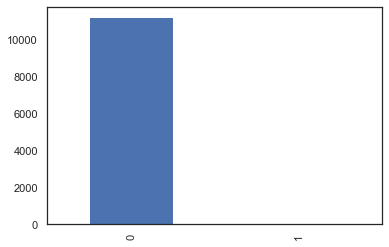

In [91]:
print(y.value_counts())
y.value_counts().plot(kind='bar')

# Regression

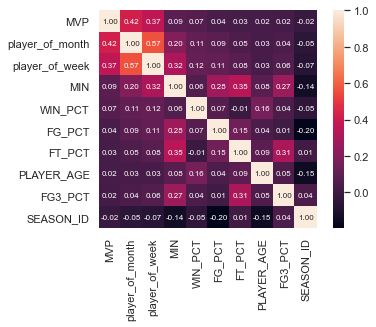

In [92]:
corrmat = df.corr()

k = 10 # show top k most correlated features
cols = corrmat.nlargest(k, 'MVP')['MVP'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [93]:
# drop correlated feautures
X_corr = X.corr()
corr_names = set()
for i in range(len(X_corr .columns)):
    for j in range(i):
        if abs(X_corr.iloc[i, j]) > 0.8:
            col = X_corr.columns[i]
            corr_names.add(col)

X.drop(columns=corr_names,inplace=True)
X_test.drop(columns=corr_names,inplace=True)

In [94]:
features = ['PLAYER_AGE', 'GP_player', 'GS', 'MIN', 'FGM_player', 'FGA_player',
       'FG_PCT_player', 'FG3M_player', 'FG3A_player', 'FG3_PCT_player',
       'FTM_player', 'FTA_player', 'FT_PCT_player', 'OREB_player',
       'DREB_player', 'REB_player', 'AST_player', 'STL_player', 'BLK_player',
       'TOV_player', 'PF_player', 'PTS_player', 'WINS','player_of_week', 'player_of_month']

In [95]:
# fit logistic regression and only show significant features
import statsmodels.api as sm
X_logit = X.drop(columns=['PLAYER_ID','SEASON_ID'])
ols = sm.Logit(y,X_logit.astype('float'))
result = ols.fit()
p_values = result.summary2().tables[1]['P>|z|']
p_values = pd.Series(p_values).sort_values(ascending = True)
p_values[p_values<=0.05]

Optimization terminated successfully.
         Current function value: 0.003281
         Iterations 23


player_of_week    0.000003
PLAYER_AGE        0.000148
MIN               0.000187
FG_PCT            0.000721
AST               0.000749
PF                0.007967
GS                0.009774
FTA               0.009836
FTM               0.022049
GP                0.024100
STL               0.026769
Name: P>|z|, dtype: float64

In [96]:
print(result.summary2())

                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.759     
Dependent Variable:  MVP               AIC:               123.6756  
Date:                2021-12-19 03:19  BIC:               306.8319  
No. Observations:    11229             Log-Likelihood:    -36.838   
Df Model:            24                LL-Null:           -152.90   
Df Residuals:        11204             LLR p-value:       5.6153e-36
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      23.0000                                        
--------------------------------------------------------------------
                  Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
--------------------------------------------------------------------
PLAYER_AGE       -12.0455   3.1743 -3.7947 0.0001  -18.2670  -5.8240
GP              -236.5829 104.8899 -2.2555 0.0241 -442.1633 -31.0025
GS               284.5698 110.1386  2.5837 0.0098   68.7020 5

0.6296296296296297


Text(0.5, 1.0, 'Lasso Regression')

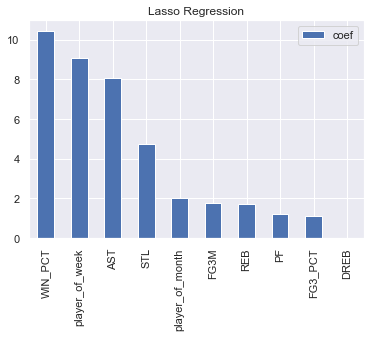

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr =LogisticRegression(penalty='l1',solver='liblinear',class_weight='balanced',C=0.5)
lr.fit(X_logit,y)

print(roc_auc_score(lr.predict(X_logit),y))

# plot bar chart 
pd.DataFrame(np.abs(lr.coef_.reshape(-1,1)),index=X_logit.columns,columns=['coef']).sort_values(by=['coef'],ascending=False).head(10).plot(kind='bar')
plt.title("Lasso Regression")

# Selection

Text(0.5, 1.0, 'Random Forest')

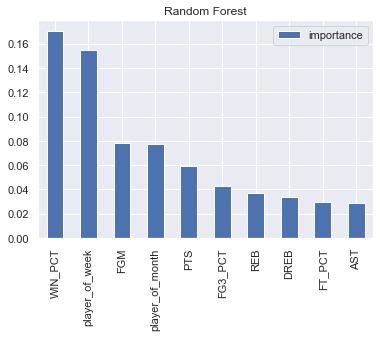

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=10,random_state=42)
rf.fit(X,y)
importance = pd.DataFrame(rf.feature_importances_,index=X.columns.tolist(),columns=['importance']).sort_values(by='importance',ascending=False)
importance.head(10).plot(kind='bar')
plt.title("Random Forest")

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score,roc_auc_score, f1_score,plot_confusion_matrix, plot_roc_curve,plot_precision_recall_curve

model = RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=5,criterion='entropy',max_features='auto',n_estimators=500)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [100]:
print("=====cv score=====")
print("roc_auc_avg:{:.3f}".format(np.mean(scores)))
print("roc_auc_std:{:.3f}".format(np.std(scores)))

=====cv score=====
roc_auc_avg:0.997
roc_auc_std:0.004


In [101]:
model.fit(X,y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, n_estimators=500, random_state=42)

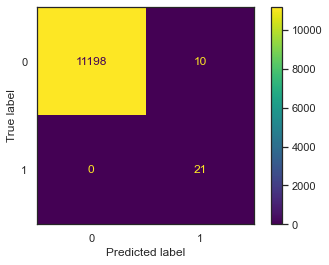

In [102]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
sns.set_style('white')
plot_confusion_matrix(model,X,y)


In [103]:
# fit to test set
result = pd.DataFrame(model.predict_proba(X_test),index = X_test.PLAYER_ID)

result.rename(columns={0:'not',1:'mvp'},inplace=True)

#result['y/n'] = model.predict(X_test)

In [104]:
mvp_candidates = result.sort_values(by='mvp',ascending=False)

In [105]:
mvp_candidates.reset_index(inplace=True)

In [106]:
mvp_candidates.drop(columns=['not'],inplace=True)

In [107]:
from nba_api.stats.static import players
# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()
print('Number of players fetched: {}'.format(len(nba_players)))

Number of players fetched: 4723


In [108]:
nba_players = pd.DataFrame(nba_players)

In [109]:
nba_players.rename(columns={"id":"PLAYER_ID"},inplace = True)

In [110]:
mvp_candidates = mvp_candidates.merge(nba_players.loc[:,['PLAYER_ID','full_name']],on='PLAYER_ID',how='left')

In [111]:
mvp_candidates.head(10)

,PLAYER_ID,mvp,full_name
0,201939,0.498403,Stephen Curry
1,201142,0.277524,Kevin Durant
2,1629027,0.252216,Trae Young
3,201935,0.204009,James Harden
4,202331,0.078651,Paul George
5,1626157,0.070168,Karl-Anthony Towns
6,1628378,0.060403,Donovan Mitchell
7,203078,0.056183,Bradley Beal
8,1628970,0.054480,Miles Bridges
9,1628369,0.044816,Jayson Tatum


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Stephen Curry'),
  Text(1, 0, 'Kevin Durant'),
  Text(2, 0, 'Trae Young'),
  Text(3, 0, 'James Harden'),
  Text(4, 0, 'Paul George'),
  Text(5, 0, 'Karl-Anthony Towns'),
  Text(6, 0, 'Donovan Mitchell'),
  Text(7, 0, 'Bradley Beal'),
  Text(8, 0, 'Miles Bridges'),
  Text(9, 0, 'Jayson Tatum')])

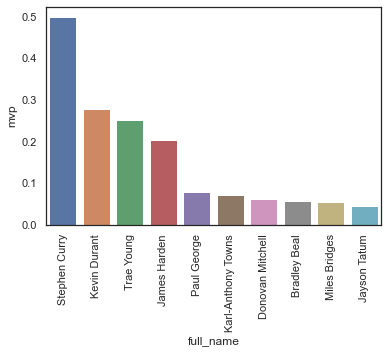

In [112]:
sns.barplot(x='full_name',y='mvp',data=mvp_candidates.head(10))
plt.xticks(rotation=90)

# Conclusion

The prediction is somewhat accurate; the official MVP ladder ranked by the NBA had Kevin Durant ranked No.1 just recently, Curry second, followed by Jokic, Giannis, Chris Paul, Donovan Mitchell, Rudy Gobert, Zach Lavin, Trae Young, and LeBron. 4 of the players are in the prediction model. Also, an interesting find here, rarely two players would be on the top-10 of the MVP ranking simultaneously. However, it occurs in the actual ranking (Mitchell and Gobert for the Jazz) and the prediction model (Harden and Durant for the Nets).